In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns

# Bland Altman manual vs automatic

In [4]:
preds_excel_test1 = pd.read_excel('./Performance progress data.xlsx', sheet_name='Test 1')
preds_excel_test2 = pd.read_excel('./Performance progress data.xlsx', sheet_name='Test 2')
preds_excel_test3 = pd.read_excel('./Performance progress data.xlsx', sheet_name='Test 3')

In [7]:
def plot_ba(test_sheet, type):

    manual = test_sheet['Manual_{}'.format(type)][:162]
    manual.replace(-99, 0.0, inplace = True)

    ai = test_sheet['AI_{}'.format(type)][:162]

    list_fp = []
    list_fn = []
    list_nulls = []
    list_drops = []

    for value in range(len(manual)):

        if manual[value] == 0.0 and ai[value] != 0.0:
            list_fp.append(value)

        if manual[value] != 0.0 and ai[value] == 0.0:
            list_fn.append(value)

        if manual[value] == 0.0 and ai[value] == 0.0:
            list_nulls.append(value)

    list_drops.extend(list_fp)
    list_drops.extend(list_fn)
    list_drops.extend(list_nulls)
    ai.drop(list_drops, inplace=True)
    manual.drop(list_drops, inplace=True)

    # mean = np.mean([manual, ai], axis=0)
    # diff = manual - ai
    # md = np.mean(diff)
    # sd = np.std(diff)
    # plt.scatter(mean, diff)
    # plt.axhline(md,           color='gray', linestyle='--')
    # plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    # plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

    if type == 'FCT':

        fig, axes = plt.subplots()
        
        sm.graphics.mean_diff_plot(ai, manual, ax = axes)
        plt.xlabel('Mean FCT')
        plt.ylabel('FCT difference (ai - manual)')
        plt.title('FCT manual vs automatic')
        plt.xlim(-30, 650)
        plt.ylim(-400, 400)
        
    elif type == 'lipid_arc':

        fig, axes = plt.subplots()
        
        sm.graphics.mean_diff_plot(ai, manual, ax = axes)
        plt.xlabel('Mean lipid arc')
        plt.ylabel('Lipid arc difference (ai - manual)')
        plt.title('Lipid arc manual vs automatic')
        plt.xlim(-20, 400)
        plt.ylim(-75, 150)


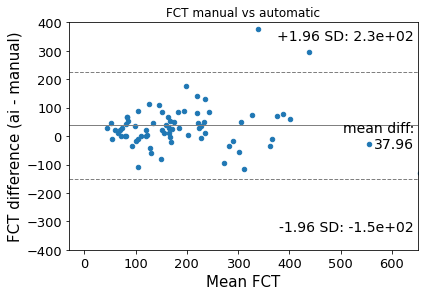

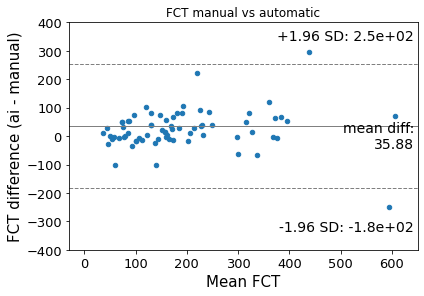

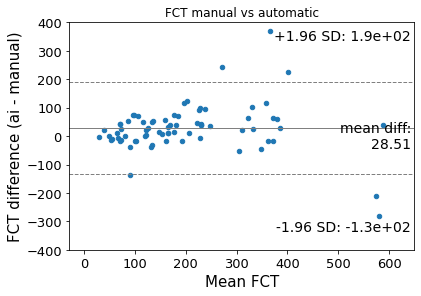

In [8]:
plot_ba(preds_excel_test1, 'FCT')
plot_ba(preds_excel_test2, 'FCT')
plot_ba(preds_excel_test3, 'FCT')

-10.566666666666666
36.24560417791683
-6.061643835616438
31.468138398769412
-1.7094594594594599
26.46747707944713


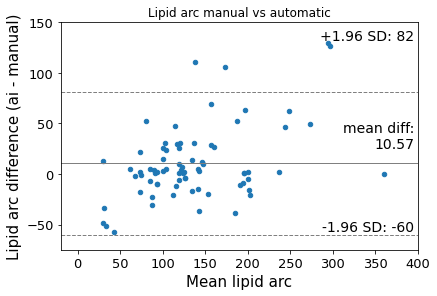

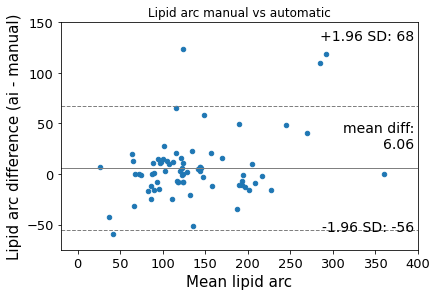

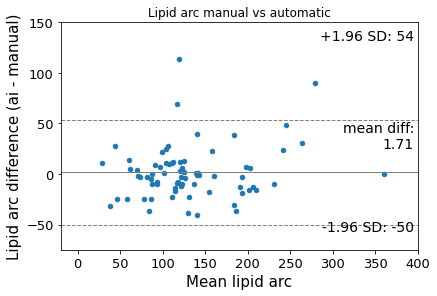

In [76]:
plot_ba(preds_excel_test1, 'lipid_arc')
plot_ba(preds_excel_test2, 'lipid_arc')
plot_ba(preds_excel_test3, 'lipid_arc')

# Bland Altman using same manual segmentations

In [6]:
manual_automatic = pd.read_excel(r'Z:\grodriguez\CardiacOCT\code\count-distributions\manual_vs_automatic_fct_arc.xlsx')

In [11]:
fct = manual_automatic[['FCT automatic', 'FCT manual']]
lipid_arc = manual_automatic[['Lipid arc automatic', 'Lipid arc manual']]

In [31]:
region = fct

manual = region['{} manual'.format('FCT')]
automatic = region['{} automatic'.format('FCT')]

list_fp = []
list_fn = []
list_nulls = []
list_drops = []

for value in range(len(region)):

    if manual[value] == 0.0 and automatic[value] != 0.0:
        list_fp.append(value)

    if manual[value] != 0.0 and automatic[value] == 0.0:
        list_fn.append(value)

    if manual[value] == 0.0 and automatic[value] == 0.0:
        list_nulls.append(value)

list_drops.extend(list_fp)
list_drops.extend(list_fn)
list_drops.extend(list_nulls)
automatic.drop(list_drops, inplace=True)
manual.drop(list_drops, inplace=True)
print(len(manual))

In [20]:
def plot_ba_new(region, type):
    
    manual = region['{} manual'.format(type)]
    automatic = region['{} automatic'.format(type)]

    list_fp = []
    list_fn = []
    list_nulls = []
    list_drops = []

    for value in range(len(region)):

        if manual[value] == 0.0 and automatic[value] != 0.0:
            list_fp.append(value)

        if manual[value] != 0.0 and automatic[value] == 0.0:
            list_fn.append(value)

        if manual[value] == 0.0 and automatic[value] == 0.0:
            list_nulls.append(value)

    list_drops.extend(list_fp)
    list_drops.extend(list_fn)
    list_drops.extend(list_nulls)
    automatic.drop(list_drops, inplace=True)
    manual.drop(list_drops, inplace=True)

    # mean = np.mean([manual, automatic], axis=0)
    # diff = manual - automatic
    # md = np.mean(diff)
    # sd = np.std(diff)
    # plt.scatter(mean, diff)
    # plt.axhline(md,           color='gray', linestyle='--')
    # plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    # plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

    if type == 'FCT':

        fig, axes = plt.subplots()
        
        sm.graphics.mean_diff_plot(automatic, manual, ax = axes)
        plt.xlabel('Mean FCT')
        plt.ylabel('FCT difference (ai - manual)')
        plt.title('FCT manual vs automatic')
        plt.xlim(-30, 650)
        plt.ylim(-400, 400)
        
    elif type == 'lipid_arc':

        fig, axes = plt.subplots()
        
        sm.graphics.mean_diff_plot(automatic, manual, ax = axes)
        plt.xlabel('Mean lipid arc')
        plt.ylabel('Lipid arc difference (ai - manual)')
        plt.title('Lipid arc manual vs automatic')
        plt.xlim(-20, 400)
        plt.ylim(-75, 150)


C:\Users\gonza\AppData\Local\Temp\ipykernel_17792\3402491138.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  automatic.drop(list_drops, inplace=True)
C:\Users\gonza\AppData\Local\Temp\ipykernel_17792\3402491138.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manual.drop(list_drops, inplace=True)


-2.1973684210526314
95.8167137020141


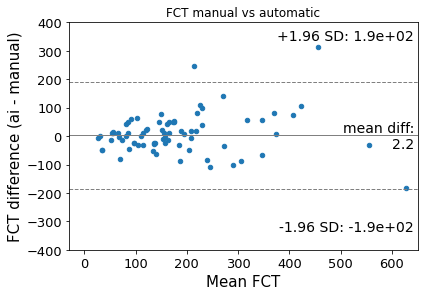

In [21]:
plot_ba_new(fct, 'FCT')